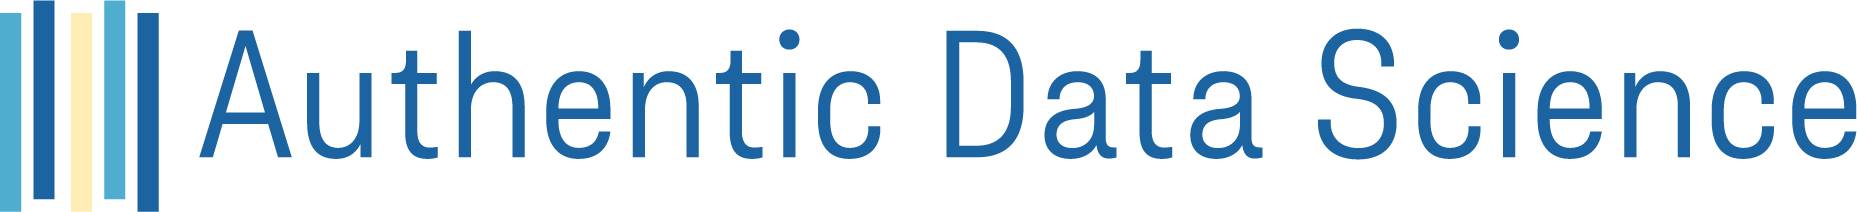

All rights to this material and its parts reserved by the authors:

- Róbert Barcík (robert@authenticdatascience.com)
- Patrik Žatko (patrik@authenticdatascience.com)
- Jana Gecelovská (janka@authenticdatascience.com)

Licenses and citations are at the bottom of the notebook.

# About

This is an exercise notebook for convolutional neural networks. You will practice building the CNNs.

# Imports

In [1]:
# ! pip install tensorflow==2.10.0
# ! pip install keras==2.10.0
# ! pip install matplotlib==3.6.2
# ! pip install numpy==1.23.4
# ! pip install scikit-learn==1.1.3

In [2]:
# ! conda install -c anaconda tensorflow==2.9.1 -y
# ! conda install -c anaconda keras==2.9.0 -y
# ! conda install -c conda-forge matplotlib==3.6.2 -y
# ! conda install -c conda-forge numpy==1.23.4 -y
# ! conda install -c conda-forge scikit-learn==1.1.3 -y

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import Dense, Activation, Flatten, Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
import tensorflow as tf

/HDD_1TB/programs/anaconda3/envs/lvl4cv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Exercise

## Load Data

Choose a data loading option that is suitable for your working environment. After choosing your option uncomment the respective cell below this cell:
1. GOOGLE COLAB or LOCAL JUPYTER **Load the data with Tensorflow**
   - Run the code cell containing the commands to install and load the needed library and load the data.
   - Tensorflow might need a different installation depending on the operating system. If this does not work for you try a different option.
   

2. GOOGLE COLAB: **Uploading file from your local machine into Colab session**
   - On the left pane click the "Files" icon that will open "Files explorer". Right click with your mouse and create a folder named 'data'. Enter the created folder and then click on "Upload to session storage" icon and navigate to the folder where you stored the data. If your uploaded files do not appear immediately, click the "Refresh" button. This might take few minutes depending on your internet speed as the files have ca 190 MB in total.
   - Be mindful that you might have to reload the data whenever you restart your session, so this option is the least practical.
   

3. LOCAL JUPYTER **Loading the data via relative path into Jupyter notebook**
   - Run the cell code containing the path to a data folder with the files stored on your computer next to this notebook.
   - Be mindful that if you move your notebook away from the "data" folder stored next to it, you might have to adjust the path.

If you work on your company machine, your company's firewall might be blocking e.g. Google Colab, uploading file to the Google Colab or installation of some packages.


In [4]:
# OPTION 1
# load the data with tensorflow

# You can check a library version installed in your environment by uncommenting and executing the following print statement:
#print('tensorflow version:',tf.__version__)

# read data
# (x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [5]:
# OPTION 2 / OPTION 3
with open('data/x_train_mnist.pkl', 'rb') as handle:
    x_train = pickle.load(handle)
with open('data/x_test_mnist.pkl', 'rb') as handle:
    x_test = pickle.load(handle)
with open('data/y_train_mnist.pkl', 'rb') as handle:
    y_train = pickle.load(handle)
with open('data/y_test_mnist.pkl', 'rb') as handle:
    y_test = pickle.load(handle)

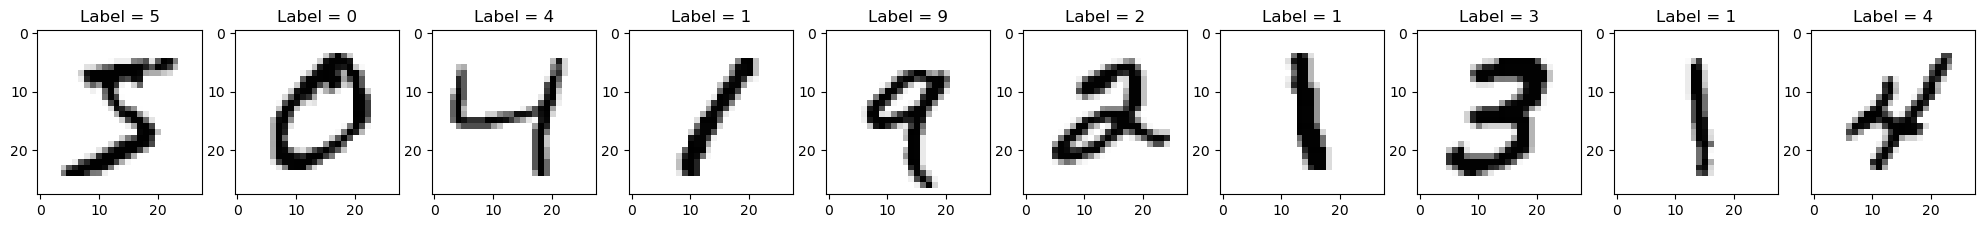

In [6]:
# split to train, validation, test
x_train, x_valid, y_train, y_valid = train_test_split(x_train, 
                                                      y_train, 
                                                      test_size=1/6,
                                                      random_state=42,
                                                      shuffle=False)

# visualize the images
fig, ax = plt.subplots(1, 10, figsize=(25, 7))
for i in range(10):
    ax[i].imshow(x_train[i], cmap=plt.cm.gray_r,)
    ax[i].set_title(f'Label = {y_train[i]}')

In [7]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


There are 50000 images of handwritten digits of size 28x28 in the train set and 10000 in both test and validation set. Labels are provided for each picture. There is only 1 channel for colors so they are all grayscale. However, this channel is not printed in the .shape output. Keras expects the inputs to the model to be in the format: (# observations, # rows, # columns, # channels). Therefore we will reshape our dataset to have also information about the channels.   

In [8]:
# reshape the images to the expected shape
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_valid.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(50000, 28, 28, 1) (50000,)
(10000, 28, 28, 1) (10000,)
(10000, 28, 28, 1) (10000,)


In [9]:
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

# normalize for the neural network
x_train = x_train/255
x_valid = x_valid/255
x_test = x_test/255

## Model

Now, it is time that you build a convolutional neural network.

In [10]:
# TASK 1: create a convolutional neural network
#     >>> instantiate the sequential model and save to variable model
#     >>> add a convolutional layer with 64 filters of size 3, valid padding
#         relu activation function and appropriate input shape
#     >>> add a max pooling layer with a pooling window of size 2
#     >>> add another convolutional layer with 16 filters of size 3 and relu
#     >>> add another pooling layer with a pooling window of size 2
#     >>> add a flattening layer
#     >>> add a dense layer with 16 units and relu activation
#     >>> add a dense layer with 10 units and softmax activation

# initialize the model
model = Sequential()

# the first convolution layer needs to have the input_shape specified
model.add(Conv2D(filters=64, # number of filters
                 kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='valid',
                 activation='relu',
                 input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])))

# add max pooling. It is sequentially added to the first layer so we do not 
# need to specify the input shape as it takes automatically the output shape
# of the previous layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# add another convolution layer with less filters
model.add(Conv2D(filters=16, # number of filters
                 kernel_size=(3, 3), 
                 activation='relu',
                 ))

# add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten the previous layer
model.add(Flatten())

# add dense layer
model.add(Dense(units=16,
                activation='relu'))

# add final layer
model.add(Dense(units=10,
                activation='softmax'))

2022-11-28 03:45:12.006893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-28 03:45:12.007385: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
# TASK 2: compile the model
#     >>> use SparseCategoricalCrossentropy as a loss, adam as optimizer and 
#         accuracy metric to compile the model
#     >>> print the model summary

model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy', # if we one-hot encoded the labels we would use 'categorical_crossentropy'
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        9232      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 16)                6

In [12]:
# TASK 3: fit the model on train set with batch size=128, 2 epochs and 
#         specify validation data as x_valid, y_valid

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=2,
                    validation_data=(x_valid, y_valid))

Epoch 1/2
391/391 [==============================] - 30s 75ms/step - loss: 0.5061 - accuracy: 0.8326 - val_loss: 0.1690 - val_accuracy: 0.9496
Epoch 2/2
391/391 [==============================] - 32s 81ms/step - loss: 0.1287 - accuracy: 0.9615 - val_loss: 0.1034 - val_accuracy: 0.9713


In [13]:
# TASK 4: return the score of the model on the test set

loss, score = model.evaluate(x_test, y_test)
print(score)

313/313 [==============================] - 2s 8ms/step - loss: 0.0983 - accuracy: 0.9695
0.9695000052452087


In [14]:
# TASK 5: predict on a first observation of the test set
#     >>> the model expects a shape of the data 
#         (n_observations, height, width, n_channels). Therefore, before you 
#         predict you need to reshape the observation first appropriately.
#     >>> check the true label of the first observation in the test set

model.predict(x_test[0].reshape(1, 28,28,1))

1/1 [==============================] - 0s 72ms/step


array([[1.9154245e-07, 4.7752798e-07, 8.9296198e-05, 2.0388354e-06,
        1.2546953e-06, 1.6944414e-07, 8.9832375e-10, 9.9989653e-01,
        8.1634962e-06, 2.0178247e-06]], dtype=float32)

Above, we got 1 probability per 1 class. Out prediction is the one with the highest probability.

# Licenses

**General**

- This notebook is distributed under the [Creative Commons Attribution-Share-Alike License 3.0](https://creativecommons.org/licenses/by-sa/3.0/). The full license is [here](https://creativecommons.org/licenses/by-sa/3.0/legalcode)

- This notebook is available [here](https://github.com/zatkopatrik/level4) 

**MNIST dataset**

- http://yann.lecun.com/exdb/mnist/
- [LeCun et al., 1998a]
Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998. [on-line version]

- License: Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset, which is a derivative work from original NIST datasets. MNIST dataset is made available under the terms of the [Creative Commons Attribution-Share Alike 3.0 license](https://creativecommons.org/licenses/by-sa/3.0/).

**keras**

https://github.com/keras-team/keras/blob/master/LICENSE

Apache License 2.0

Copyright 2022 The TensorFlow Authors. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.


**matplotlib**

BSD compatible license

Copyright (c) 2002 - 2012 John Hunter, Darren Dale, Eric Firing, Michael Droettboom and the Matplotlib development team; 
2012 - 2022 The Matplotlib development team

**scikit-learn**

BSD 3-Clause License

Copyright (c) 2007-2022 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.


**pickle** are iternal Python libraries.

Copyright © 2001-2022 Python Software Foundation. All rights reserved.

They are licensed under 

ZERO-CLAUSE BSD LICENSE FOR CODE IN THE PYTHON 3.11.0 DOCUMENTATION

    Permission to use, copy, modify, and/or distribute this software for any
    purpose with or without fee is hereby granted.

    THE SOFTWARE IS PROVIDED "AS IS" AND THE AUTHOR DISCLAIMS ALL WARRANTIES WITH
    REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF MERCHANTABILITY
    AND FITNESS. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR ANY SPECIAL, DIRECT,
    INDIRECT, OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER RESULTING FROM
    LOSS OF USE, DATA OR PROFITS, WHETHER IN AN ACTION OF CONTRACT, NEGLIGENCE OR
    OTHER TORTIOUS ACTION, ARISING OUT OF OR IN CONNECTION WITH THE USE OR
    PERFORMANCE OF THIS SOFTWARE.

and 

PSF LICENSE AGREEMENT FOR PYTHON 3.11.0
    
    1. This LICENSE AGREEMENT is between the Python Software Foundation ("PSF"), and
       the Individual or Organization ("Licensee") accessing and otherwise using Python
       3.11.0 software in source or binary form and its associated documentation.

    2. Subject to the terms and conditions of this License Agreement, PSF hereby
       grants Licensee a nonexclusive, royalty-free, world-wide license to reproduce,
       analyze, test, perform and/or display publicly, prepare derivative works,
       distribute, and otherwise use Python 3.11.0 alone or in any derivative
       version, provided, however, that PSF's License Agreement and PSF's notice of
       copyright, i.e., "Copyright © 2001-2022 Python Software Foundation; All Rights
       Reserved" are retained in Python 3.11.0 alone or in any derivative version
       prepared by Licensee.

    3. In the event Licensee prepares a derivative work that is based on or
       incorporates Python 3.11.0 or any part thereof, and wants to make the
       derivative work available to others as provided herein, then Licensee hereby
       agrees to include in any such work a brief summary of the changes made to Python
       3.11.0.

    4. PSF is making Python 3.11.0 available to Licensee on an "AS IS" basis.
       PSF MAKES NO REPRESENTATIONS OR WARRANTIES, EXPRESS OR IMPLIED.  BY WAY OF
       EXAMPLE, BUT NOT LIMITATION, PSF MAKES NO AND DISCLAIMS ANY REPRESENTATION OR
       WARRANTY OF MERCHANTABILITY OR FITNESS FOR ANY PARTICULAR PURPOSE OR THAT THE
       USE OF PYTHON 3.11.0 WILL NOT INFRINGE ANY THIRD PARTY RIGHTS.

    5. PSF SHALL NOT BE LIABLE TO LICENSEE OR ANY OTHER USERS OF PYTHON 3.11.0
       FOR ANY INCIDENTAL, SPECIAL, OR CONSEQUENTIAL DAMAGES OR LOSS AS A RESULT OF
       MODIFYING, DISTRIBUTING, OR OTHERWISE USING PYTHON 3.11.0, OR ANY DERIVATIVE
       THEREOF, EVEN IF ADVISED OF THE POSSIBILITY THEREOF.

    6. This License Agreement will automatically terminate upon a material breach of
       its terms and conditions.

    7. Nothing in this License Agreement shall be deemed to create any relationship
       of agency, partnership, or joint venture between PSF and Licensee.  This License
       Agreement does not grant permission to use PSF trademarks or trade name in a
       trademark sense to endorse or promote products or services of Licensee, or any
       third party.

    8. By copying, installing or otherwise using Python 3.11.0, Licensee agrees
       to be bound by the terms and conditions of this License Agreement.

**tensorflow**

https://github.com/tensorflow/tensorflow/blob/master/LICENSE

Apache License 2.0

no changes were made
Copyright: 2022 The TensorFlow Authors. All Rights Reserved.
License: http://www.apache.org/licenses/LICENSE-2.0

Some of TensorFlow's code is derived from Caffe, which is subject to the following copyright notice:
COPYRIGHT

All contributions by the University of California:

Copyright (c) 2014, The Regents of the University of California (Regents)
All rights reserved.

All other contributions:

Copyright (c) 2014, the respective contributors
All rights reserved.

LICENSE

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR
ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
(INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
(INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
